In [160]:
#Conecting to Google Drive



!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

gpg: keybox '/tmp/tmpkq7we_0k/pubring.gpg' created
gpg: /tmp/tmpkq7we_0k/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [0]:
!pip install -q keras

In [162]:
#!pip install psycopg2
!pip install psycopg2-binary
!pip install h5py

In [0]:
import numpy as np

from keras.preprocessing.text import Tokenizer


import random

from keras import preprocessing
from keras.preprocessing.sequence import pad_sequences


from keras.models import Sequential 
from keras.layers import Flatten, Dense
from keras.layers import Embedding
import os



In [164]:
cd '/content/drive/Data Mining Project/Neural_Net'

/content/drive/Data Mining Project/Neural_Net


In [0]:
from  PostgreSQLConnector import PostgresConnector

def Data_Query(user_query):

    postgres = PostgresConnector()

    connObj = postgres.connect()
    cur = connObj.cursor()


    cur.execute( user_query )
    
    x = []

 
    for row in cur:
 
        
        x.append( row[1].strip("RT ") )
 
    

    cur.close()
    
    return x


#Library to use regular expressions to remove URLS in data set
import re
 


def Get_list_nonsexist_tweets():

    nonsexist_tweets = Data_Query("SELECT * FROM \"Tweets\" where label = 'none' ")

    for e in range(len(nonsexist_tweets)):
      nonsexist_tweets[e] =  re.sub(r"http\S+", "", nonsexist_tweets[e])

    return nonsexist_tweets

 
 
def Get_list_sexist_tweets():

    sexist_tweets = Data_Query("SELECT * FROM \"Tweets\" where label = 'sexist' ")

    for e in range(len(sexist_tweets)):
        sexist_tweets[e] =  re.sub(r"http\S+", "", sexist_tweets[e])

    return sexist_tweets

In [166]:
nonsexist_tweets = Get_list_nonsexist_tweets()
sexist_tweets = Get_list_sexist_tweets()

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.1 on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 6.3.0-12ubuntu2) 6.3.0 20170406, 64-bit',)
Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.1 on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 6.3.0-12ubuntu2) 6.3.0 20170406, 64-bit',)


In [167]:
print( sexist_tweets[100:105])
print( nonsexist_tweets[100:105])



['"""@PoemsPorn: Quote this tweet with your favorite animal.""pussy"', '"""@Poobie_: When bitches TWERK on the computer....', '@McwilliamsBrett shut your legs hoe', '@Meeeesh1395 @Ajbernal17 bitch im always out', '@Miss_Didi23 @LINDNLD @KLSouth shut up you nappy headed hoe']
['@kate_1985 - not sure!! But never fear @mykitchenrules still has 751 teams left and another Instant Restaurant round to come. #MK', 'NOOOOOOOOOOO no more instant resturants go away #MK', '@Matt_Cooke86 Nutrition is key to closing the .#Aboriginal life expectancy gap  @croakeyblog ', 'Please enjoy my deconstructed lemon tart. #MKR ', 'hey barely cooked anything on that entrée #MK']


In [168]:
nonsexist_tweets[0:5]

['3 chef wankers #MK',
 '@Cee_Murda94 yellow fin',
 'pucker lips lol #mkr',
 '"@iamkrause',
 '#mkr ']

In [169]:
# Join the set of sexist and non sexist tweets in order to tokenize
all_tweets = []

for k in range(len(nonsexist_tweets)):
  all_tweets.append(nonsexist_tweets[k])

for k in range(len(sexist_tweets)):
  all_tweets.append(sexist_tweets[k])
  
print(len(all_tweets))

31239


In [0]:
#Creating labels vector

tweets_labels = [1]*(len(nonsexist_tweets)+len(sexist_tweets))
index_nonsexist = len(nonsexist_tweets)

for k in range(index_nonsexist):

  tweets_labels[k] = 0 #Since we know that these aren't sexist
  
tweets_labels = np.asarray(tweets_labels)


In [200]:
# Tokenization of tweets

# tweets_tokens = []

maxlen = 200


max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_tweets)
sequences = tokenizer.texts_to_sequences(all_tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

tweets_tokens = pad_sequences(sequences, maxlen=maxlen)





print('Shape of data tensor:', tweets_tokens.shape)
print('Shape of label tensor:', tweets_labels.shape)



Found 39086 unique tokens.
Shape of data tensor: (31239, 200)
Shape of label tensor: (31239,)


In [201]:
class_ratio = len(nonsexist_tweets)/len(sexist_tweets)

print(len(sexist_tweets))
print(len(nonsexist_tweets))
print("Non sexist to sexist ratio: "+str(class_ratio))

17218
14021
Non sexist to sexist ratio: 0.8143222209315832


In [202]:
print( tweets_labels[index_nonsexist-10:index_nonsexist] )
print( tweets_labels[index_nonsexist+1:index_nonsexist+11] )


[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]


In [0]:
#Shuffle two list at once with same order


 
mixed = list(zip(tweets_tokens, tweets_labels))

random.shuffle(mixed)

tweets_tokens, tweets_labels = zip(*mixed)

In [204]:
# Looking if the shuffleing worked

print(tweets_labels[25:27])
print(tweets_tokens[25:27])

(1, 0)
(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 

In [205]:
# Data Splitting and Filling
# We split 80% of the data for the training set and 20% for the test set

index_eighty = round(0.8*len(tweets_tokens))

fifty_eighty = round(0.8*len(tweets_tokens))

current_index = index_eighty


x_train = np.array( tweets_tokens[:current_index] )
x_test =  np.array( tweets_tokens[current_index:] )

y_train = np.array( tweets_labels[:current_index] )
y_test =  np.array( tweets_labels[current_index:] )

print(x_train[-1] == x_test[0])

#max_words = index_eighty




[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [0]:


max_features = len(x_train)

# Filling with zeroes so dimentions fits
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [207]:
#Parsing GloVe Files

glove_dir = '/content/drive/Data Mining Project/Neural_Net/glove_files'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100


embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [209]:

model = Sequential()

model.add(Embedding( max_words, embedding_dim, input_length=maxlen))

model.add(Flatten())

# Adding a classifier layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


#Addig GloVe Embeddings
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test) )
model.save_weights('pre_trained_glove_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 100)          1000000   
_________________________________________________________________
flatten_10 (Flatten)         (None, 20000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                640032    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________
Train on 24991 samples, validate on 6248 samples
Epoch 1/10
18912/24991 [=====================>........] - ETA: 1s - loss: 0.3574 - acc: 0.8438

24991/24991 [==============================] - 8s 322us/step - loss: 0.3452 - acc: 0.8499 - val_loss: 0.2977 - val_acc: 0.8683
Epoch 2/10
24991/24991 [==============================] - 8s 303us/step - loss: 0.2552 - acc: 0.8956 - val_loss: 0.2815 - val_acc: 0.8806
Epoch 3/10
24991/24991 [==============================] - 7s 299us/step - loss: 0.2112 - acc: 0.9152 - val_loss: 0.3060 - val_acc: 0.8680
Epoch 4/10
10144/24991 [===========>..................] - ETA: 3s - loss: 0.1666 - acc: 0.9365

24991/24991 [==============================] - 7s 294us/step - loss: 0.1719 - acc: 0.9332 - val_loss: 0.2879 - val_acc: 0.8894
Epoch 5/10
24991/24991 [==============================] - 8s 303us/step - loss: 0.1372 - acc: 0.9490 - val_loss: 0.3196 - val_acc: 0.8881
Epoch 6/10
24991/24991 [==============================] - 8s 306us/step - loss: 0.1070 - acc: 0.9621 - val_loss: 0.3342 - val_acc: 0.8820
Epoch 7/10
 8864/24991 [=========>....................] - ETA: 4s - loss: 0.0820 - acc: 0.9722

24991/24991 [==============================] - 7s 289us/step - loss: 0.0831 - acc: 0.9713 - val_loss: 0.3690 - val_acc: 0.8899
Epoch 8/10
24991/24991 [==============================] - 7s 300us/step - loss: 0.0654 - acc: 0.9776 - val_loss: 0.3970 - val_acc: 0.8843
Epoch 9/10
24991/24991 [==============================] - 7s 298us/step - loss: 0.0509 - acc: 0.9844 - val_loss: 0.4533 - val_acc: 0.8844
Epoch 10/10
 8544/24991 [=========>....................] - ETA: 4s - loss: 0.0396 - acc: 0.9875

24991/24991 [==============================] - 7s 295us/step - loss: 0.0404 - acc: 0.9866 - val_loss: 0.4812 - val_acc: 0.8779


In [0]:
  new_instance = ["You're a fat bitch and nobody will like you. You shouldn't exist because you are a woman"]
  # create the tokenizer
  new_tok= Tokenizer()
  # fit the tokenizer on the documents
  new_tok.fit_on_texts(new_instance)
  
  temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


In [211]:

ynew = model.predict_classes(temp)
print(ynew)

[[1]]


In [212]:
new_instance = ["You're a very likeable, I hope we can be friends"]
# create the tokenizer
test_tok= Tokenizer()
# fit the tokenizer on the documents
test_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( test_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict_classes(temp)
print("Prediction")
print(ynew)

Prediction
[[1]]


In [213]:
new_instance = ["Shut up , make a sandwich while I keep playing since you're a  "] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict_classes(temp)
print("Prediction")
print(ynew)

Prediction
[[1]]


In [214]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc eagerfpu pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm kaiser fsgsbase tsc_adjust bmi1 avx2 smep 

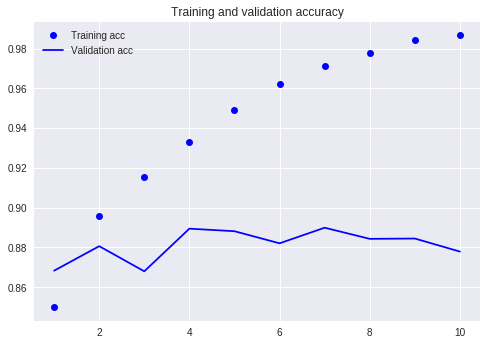

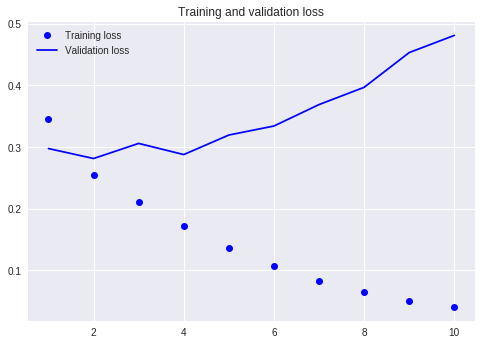

In [215]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [216]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

6248/6248 [==============================] - 1s 137us/step
Test loss: 0.4811501588848886
Test accuracy: 0.8778809218950064


In [0]:
model.save('sexist_classifier.h5')

In [223]:
new_instance = ["prepare  some food bitch"] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)



Prediction
[[0.33152494]]


In [219]:
tnew_instance = ["안녕"] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)



Prediction
[[0.99989915]]


In [220]:
print(sexist_tweets[:5])

['@rubberchloe okay love you bitch', '@ratchetandsassy @ me hoe', '@prihncess bitch', '@princessfaggit cry bitch', '@rezlife3 little bitch']


In [221]:
print(all_tweets[3:7])
print(tweets_labels[3:7])

['"@iamkrause', '#mkr ', 'I am 12. ', 'Colin is back! #MK']
(1, 1, 0, 0)


In [222]:
print(all_tweets[0])
print('\n')

print(all_tweets[1])

3 chef wankers #MK


@Cee_Murda94 yellow fin
